## 30. Аппроксимация данных. Солнечная активность

http://www.sidc.be/silso/datafiles

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. 
Изобразить данные.
Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции.
Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности.
На какой ближайший год придется следующий пик солнечной активности?

```
Читать по строкам (1900...2015):
  15.7 4.6 8.5 40.8 70.1 105.5 90.1 102.8 80.9
  73.2 30.9 9.5 6.0 2.4 16.1 79.0 95.0 173.6 134.6
  105.7 62.7 43.5 23.7 9.7 27.9 74.0 106.5 114.7
  129.7 108.2 59.4 35.1 18.6 9.2 14.6 60.2 132.8
  190.6 182.6 148.0 113.0 79.2 50.8 27.1 16.1 55.3
  154.3 214.7 193.0 190.7 118.9 98.3 45.0 20.1 6.6
  54.2 200.7 269.3 261.7 225.1 159.0 76.4 53.4
  39.9 15.0 22.0 66.8 132.9 150.0 149.4 148.0 94.4
  97.6 54.1 49.2 22.5 18.4 39.3 131.0 220.1 218.9
  198.9 162.4 91.0 60.5 20.6 14.8 33.9 123.0 211.1
  191.8 203.3 133.0 76.1 44.9 25.1 11.6 28.9 88.3
  136.3 173.9 170.4 163.6 99.3 65.3 45.8 24.7 12.6
  4.2 4.8 24.9 80.8 84.5 94.0 113.3 69.8
```

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import scipy.constants as sc
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

Запишем все исходные данные в два массива: массив лет и массив чисел Вольфа. На основе этих данных построим график, чтобы увидеть, как с течением времени изменяется солнечная активность

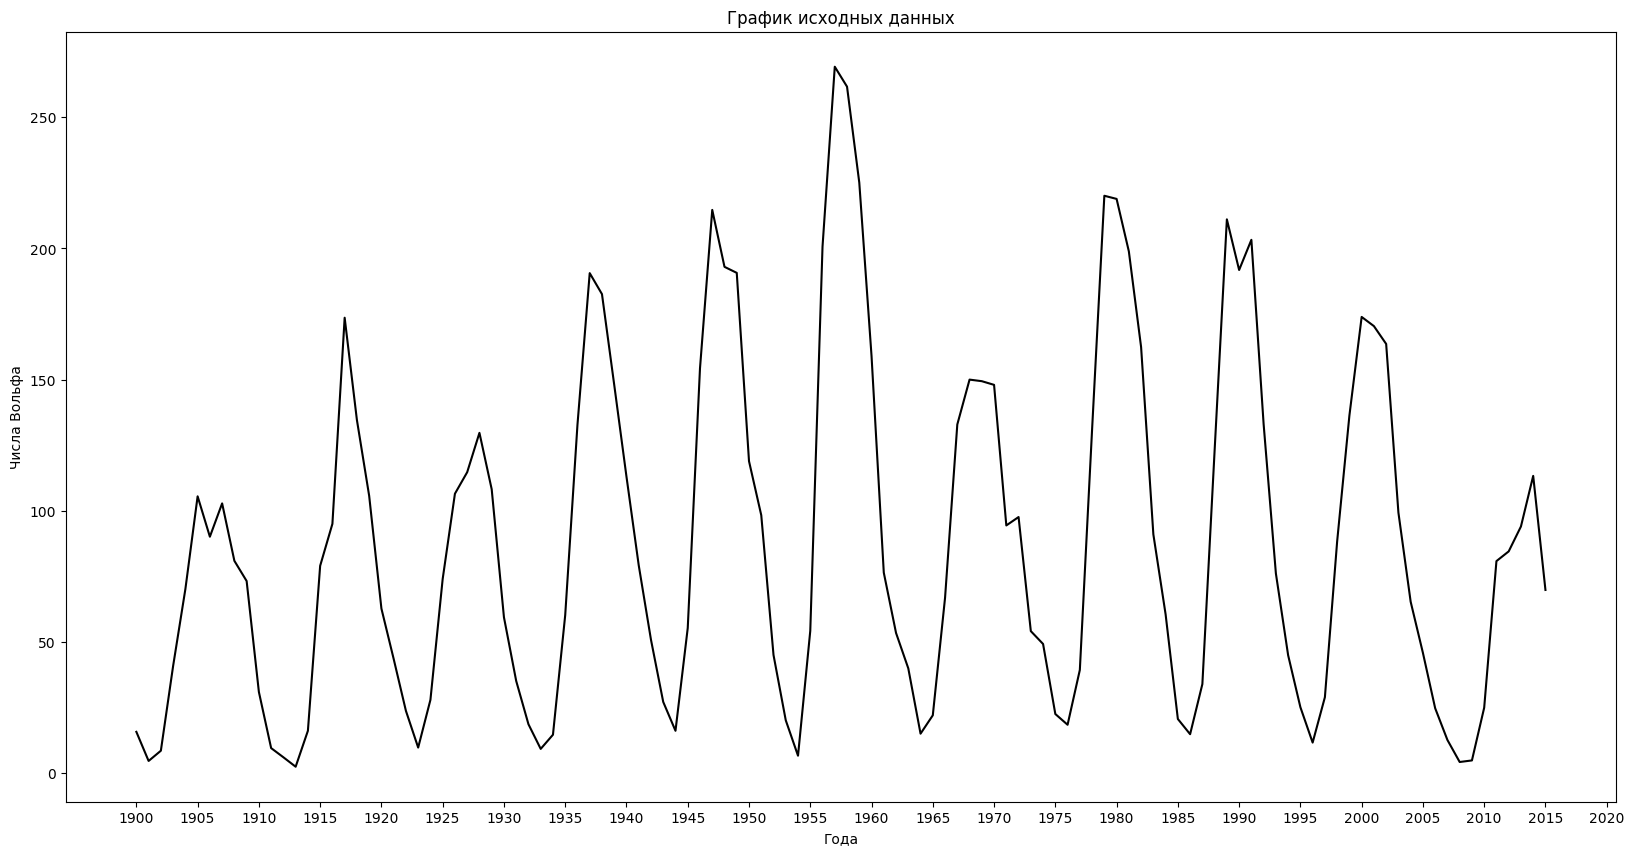

In [12]:
year  = np.arange(1900, 2016)
Wolf_numbers = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6, 105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0, 113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0, 76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9, 198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9, 170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])

plt.figure(figsize = (20, 10))
plt.xticks(years[::20])
plt.xlabel("Года")
plt.ylabel("Числа Вольфа")
plt.plot(year, Wolf_numbers, 'k')
plt.title("График исходных данных")
pass

Стоит отметить, что получившийся график очень похож на синусоиду.

Далее найдем точки локальных максимумов и минимумов. Однако по графику видно, что на некоторых предполагаемых дугах синуса расположено несколько точек максимума/минимума, следовательно, при поиске необходимо взять лишь те значения, которые нам более интересны

In [13]:
min_Wolf_numbers = np.array([])
min_years = np.array([])
max_Wolf_numbers = np.array([])
max_years = np.array([])
needful_value = True
for i in range (1, 115, +1):
  if (Wolf_numbers[i]>Wolf_numbers[i+1] and Wolf_numbers[i]>Wolf_numbers[i-1] and not needful_value):
    max_Wolf_numbers = np.append(max_Wolf_numbers, Wolf_numbers[i])
    max_years = np.append(max_years, year[i])
    needful_value = True
  if (Wolf_numbers[i]<Wolf_numbers[i+1] and Wolf_numbers[i]<Wolf_numbers[i-1] and Wolf_numbers[i]<50 and needful_value):
    min_Wolf_numbers = np.append(min_Wolf_numbers, Wolf_numbers[i])
    min_years = np.append(min_years, year[i])
    needful_value = False
print("Года с минимальной солнечной активностью", min_years.astype(int))
print("Года с максимальной солнечной активностью", max_years.astype(int))

Года с минимальной солнечной активностью [1901 1913 1923 1933 1944 1954 1964 1976 1986 1996 2008]
Года с максимальной солнечной активностью [1905 1917 1928 1937 1947 1957 1968 1979 1989 2000 2014]


Изобразим полученные результаты на графике:

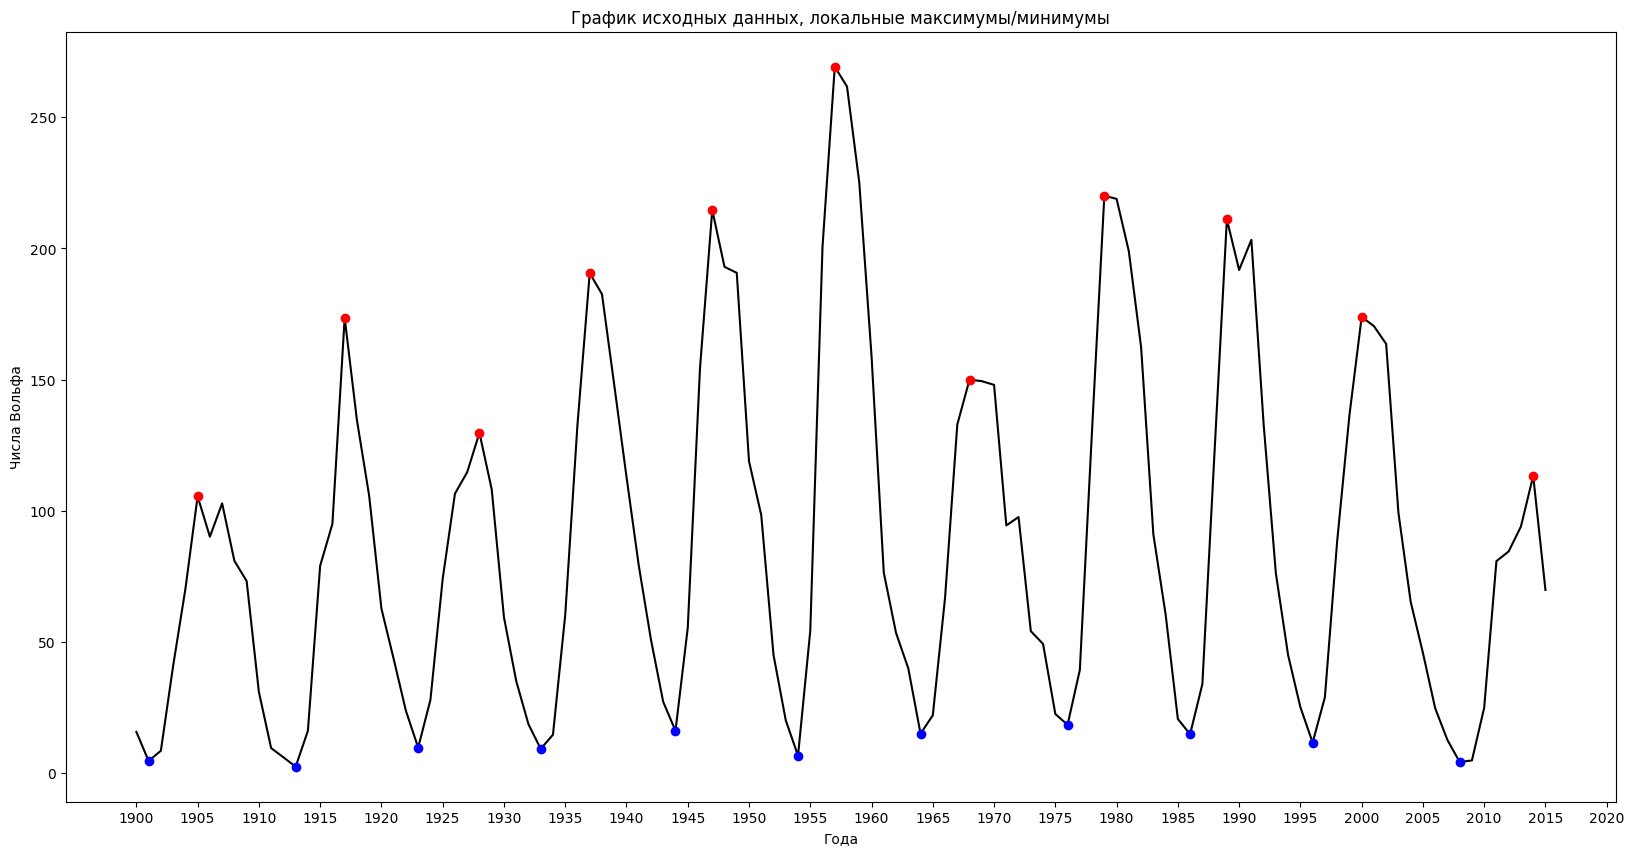

In [14]:
plt.figure(figsize = (20, 10))
plt.xticks(years[::20])
plt.xlabel("Года")
plt.ylabel("Числа Вольфа")
plt.plot(year, Wolf_numbers, 'k')
plt.plot(min_years, min_Wolf_numbers, 'bo')
plt.plot(max_years, max_Wolf_numbers, 'ro')
plt.title("График исходных данных, локальные максимумы/минимумы")
pass

Найдем приблизительный период колебания солнечной активности.

Для начала, для каждого года с минимальной/максимальной активностью найдем его разность с предыдущим минимальным/максимальным годом. Поскольку исходные данные дискретны, а не непрерывны, мы не можем утверждать, что они не искажены, а следовательно, для нахождения периода лучше использовать среднее геометрическое значение между найденными разностями, нежели арифметическое 

In [5]:
difference_in_min_years = np.array([])
for i1 in range (0, min_years.size-1, 1):
  difference_in_min_years = np.append(difference_in_min_years, min_years[i1+1]-min_years[i1])
average_of_min_years = gmean(difference_in_min_years)
print("Среднее геометрическое между годами с наблюдаемыми минимумами активности: ", average_of_min_years)

difference_in_max_years = np.array([])
for i2 in range (0, max_years.size-1, 1):
  difference_in_max_years = np.append(difference_in_max_years, max_years[i2+1]-max_years[i2])
average_of_max_years = gmean(difference_in_max_years)
print("Среднее геометрическое между годами с наблюдаемыми максимумами активности: ", average_of_max_years)

Среднее геометрическое между годами с наблюдаемыми минимумами активности:  10.663349463976184
Среднее геометрическое между годами с наблюдаемыми максимумами активности:  10.82710262271983


Заметим, что максимумы солнечной активности также напоминают синусоиду

Воспользуемся формулой гармонических колебаний
$$ y(t)=x_m\sin{(\omega_0t+\varphi_0)}, $$ 
где $x_m$ - амплитуда колебания, $\omega_0$ - циклическая частота колебаний, а $\varphi_0$ - сдвиг начальной фазы колебаний

Поскольку нам не хватает данных для вычисления циклической частоты, а следовательно и сдвига, то найдем их подбором. Также необходимо поднять синусоиду на одну амплитуду вверх, так как даже минимумы солнечной активности имеют число Вольфа больше нуля. 

Изобразим все на графике

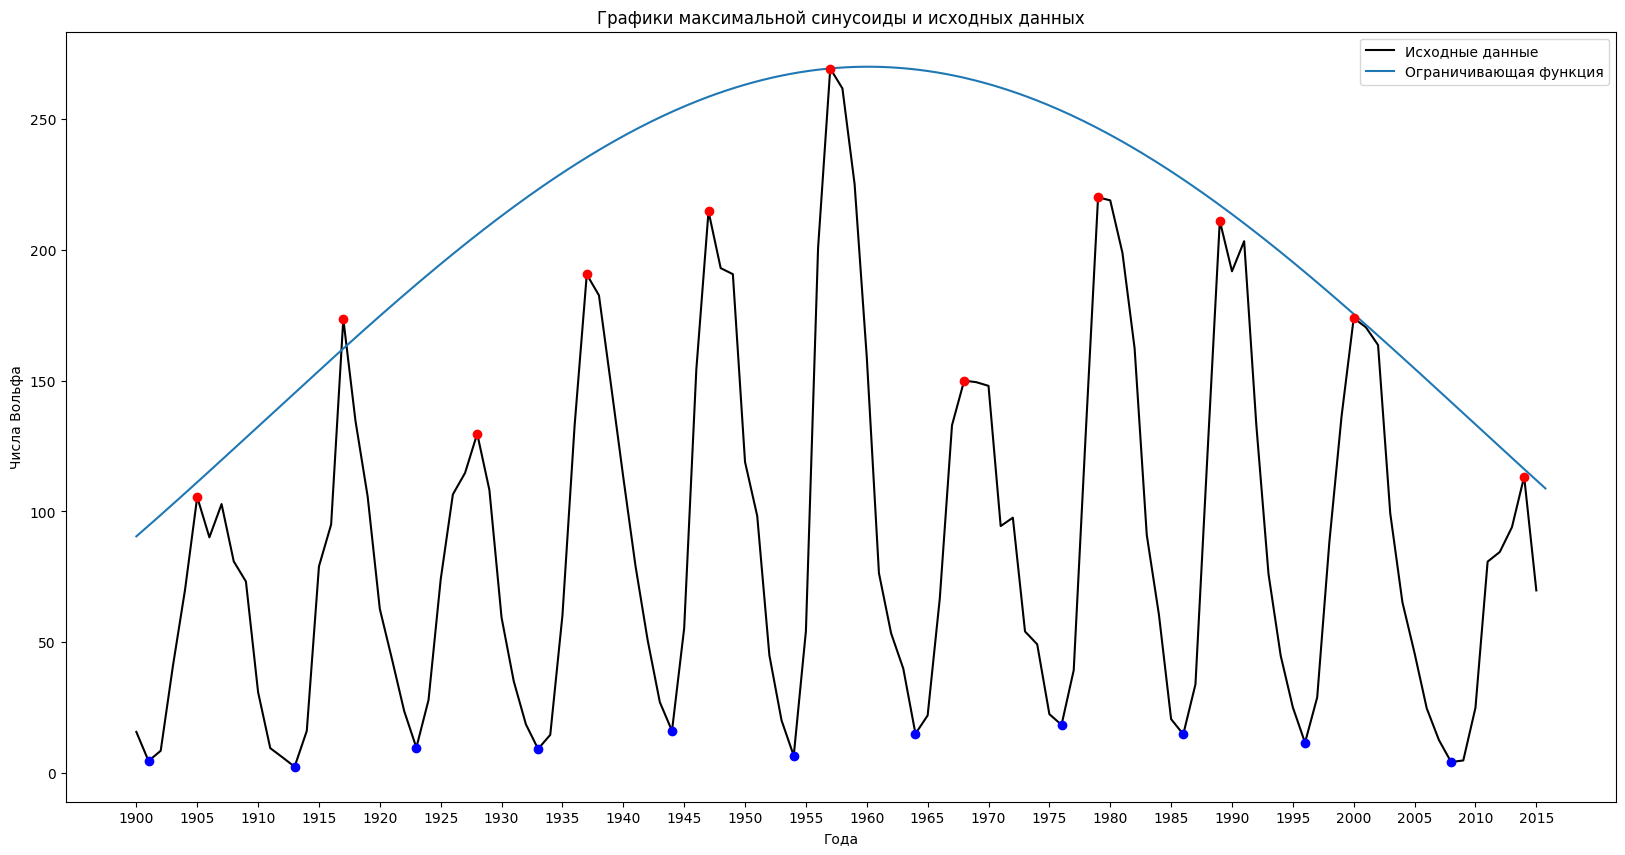

In [6]:
step = 4
years = np.arange(1900, 2016, 1 / step)
max_values_of_sin = np.sin((years - 1900) * np.pi / 99 - np.pi * 0.107) * 135 + 135

plt.figure(figsize=(20,10))
plt.xticks(years[::20])
plt.xlabel("Года")
plt.ylabel("Числа Вольфа")
plt.plot(year, Wolf_numbers, 'k', label="Исходные данные")
plt.plot(years, max_values_of_sin, label="Ограничивающая функция")
plt.plot(min_years, min_Wolf_numbers, 'bo')
plt.plot(max_years, max_Wolf_numbers, 'ro')
plt.legend()
plt.title("Графики максимальной синусоиды и исходных данных")
pass

Далее составим функцию, аппроксимирующую исходные данные

Снова запишем формулу гармонических колебаний:
$$ y(t)=x_m\sin{(\omega_0t+\varphi_0)}, $$ 
Рассмотрим неизвестные данной формулы:

$x_m$ - амплитуда колебаний, которая составляет половину значения ограничивающей функции по оси чисел Вольфа в данной точке, 

$\omega_0=\frac{2\pi}{T}$, где T - найденный нами период колебаний (далее в качестве периода будет использоваться среднее геометрическое между годами с наблюдаемыми минимумами активности, поскольку по графику можно заметить, что максимальные пики не такие точные)

Остается лишь найти сдвиг начальной фазы колебаний. Возьмем первый минимальный пик (1901 год) за точку начала отсчета t, следовательно $t=t^*-1901$. Заметим, что период колебания синуса в радианах составляет $2\pi$, а значения синуса в зависимости от угла колеблются следующим образом:
$\sin{(0)}=0$ -> $\sin{(\frac{\pi}{2})}=1$ -> $\sin{(\pi)}=0$ -> $\sin{(\frac{3\pi}{2})}=-1$ и т.д.
Следовательно, так как в 1901 году был минимальный пик, и ему соответствует пик $\sin{(\frac{3\pi}{2})}=-1$, то мы можем записать следующее уравнение:

$\sin{(\omega_0t+\varphi_0)}=\sin{(\frac{3\pi}{2})}$

Решим его, найдя $\varphi_0$

$\omega_0t+\varphi_0=\frac{3\pi}{2}$

$\varphi_0=\frac{3\pi}{2}-\omega_0t=\frac{3\pi}{2}-\omega_0(t^*-1901)=\frac{3\pi}{2}-\omega_0(1901-1901)=\frac{3\pi}{2}$

Подставим все найденные нами значения в формулу и построим функцию на графике с исходными данными и ограничивающей функцией

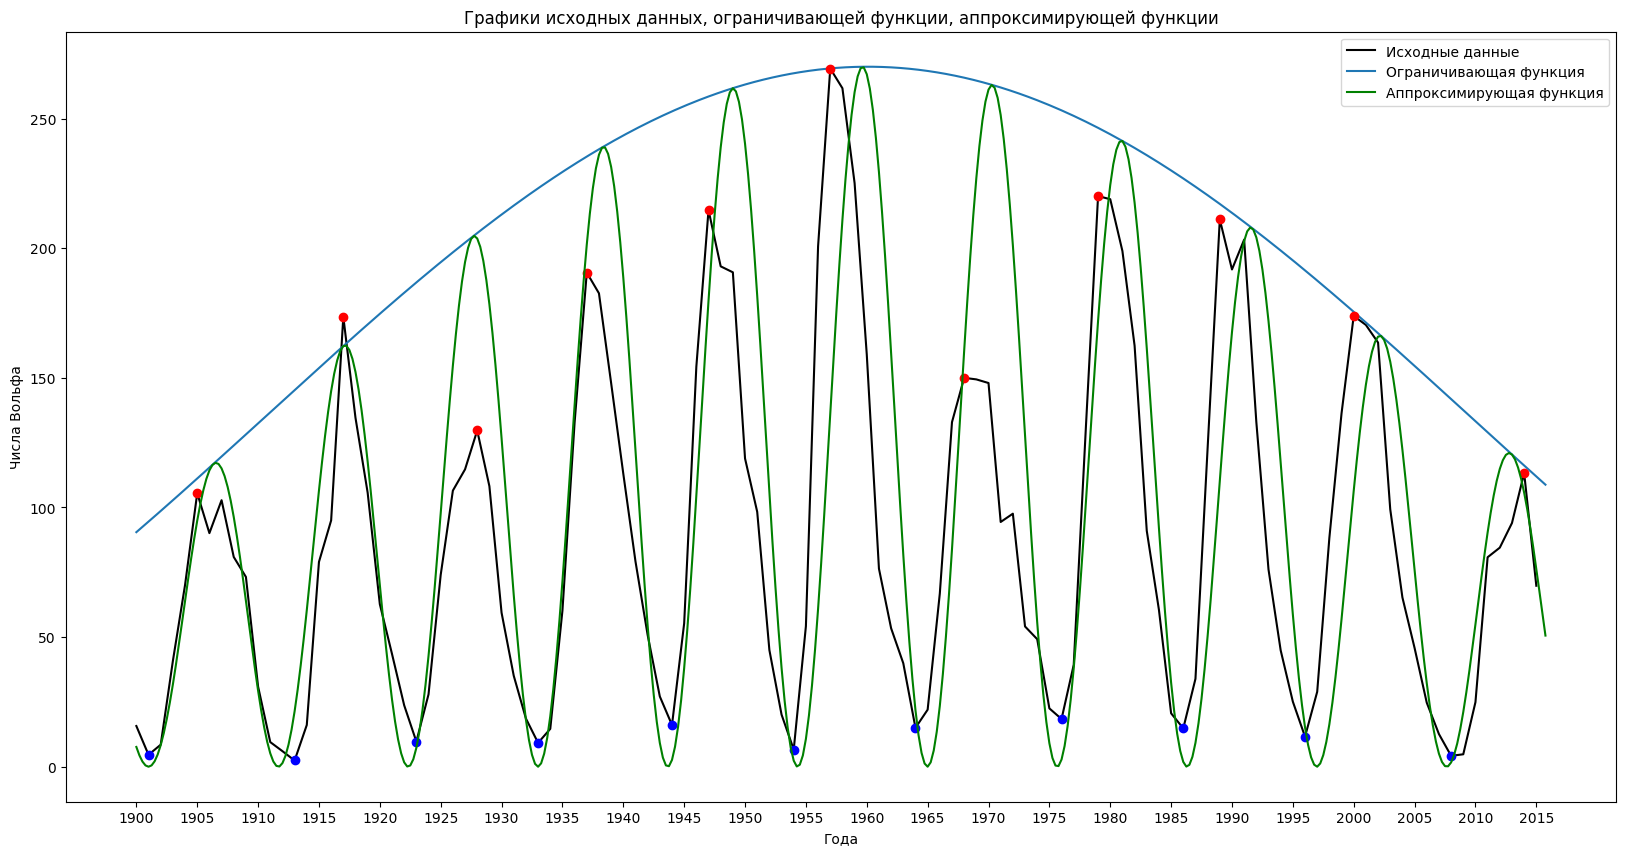

In [7]:
W = 2 * np.pi / average_of_min_years
F = 1.5 * np.pi
value_function = np.sin(W * (years - 1901) + F) * max_values_of_sin / 2 + max_values_of_sin / 2

plt.figure(figsize=(20,10))
plt.xticks(years[::20])
plt.xlabel("Года")
plt.ylabel("Числа Вольфа")
plt.plot(year, Wolf_numbers, 'k', label="Исходные данные")
plt.plot(years, max_values_of_sin, label="Ограничивающая функция")
plt.plot(min_years, min_Wolf_numbers, 'bo')
plt.plot(max_years, max_Wolf_numbers, 'ro')
plt.plot(years, value_function, 'g', label="Аппроксимирующая функция")
plt.legend()
plt.title("Графики исходных данных, ограничивающей функции, аппроксимирующей функции")
pass

Расширим временной промежуток, показанный на графике до 2100 года

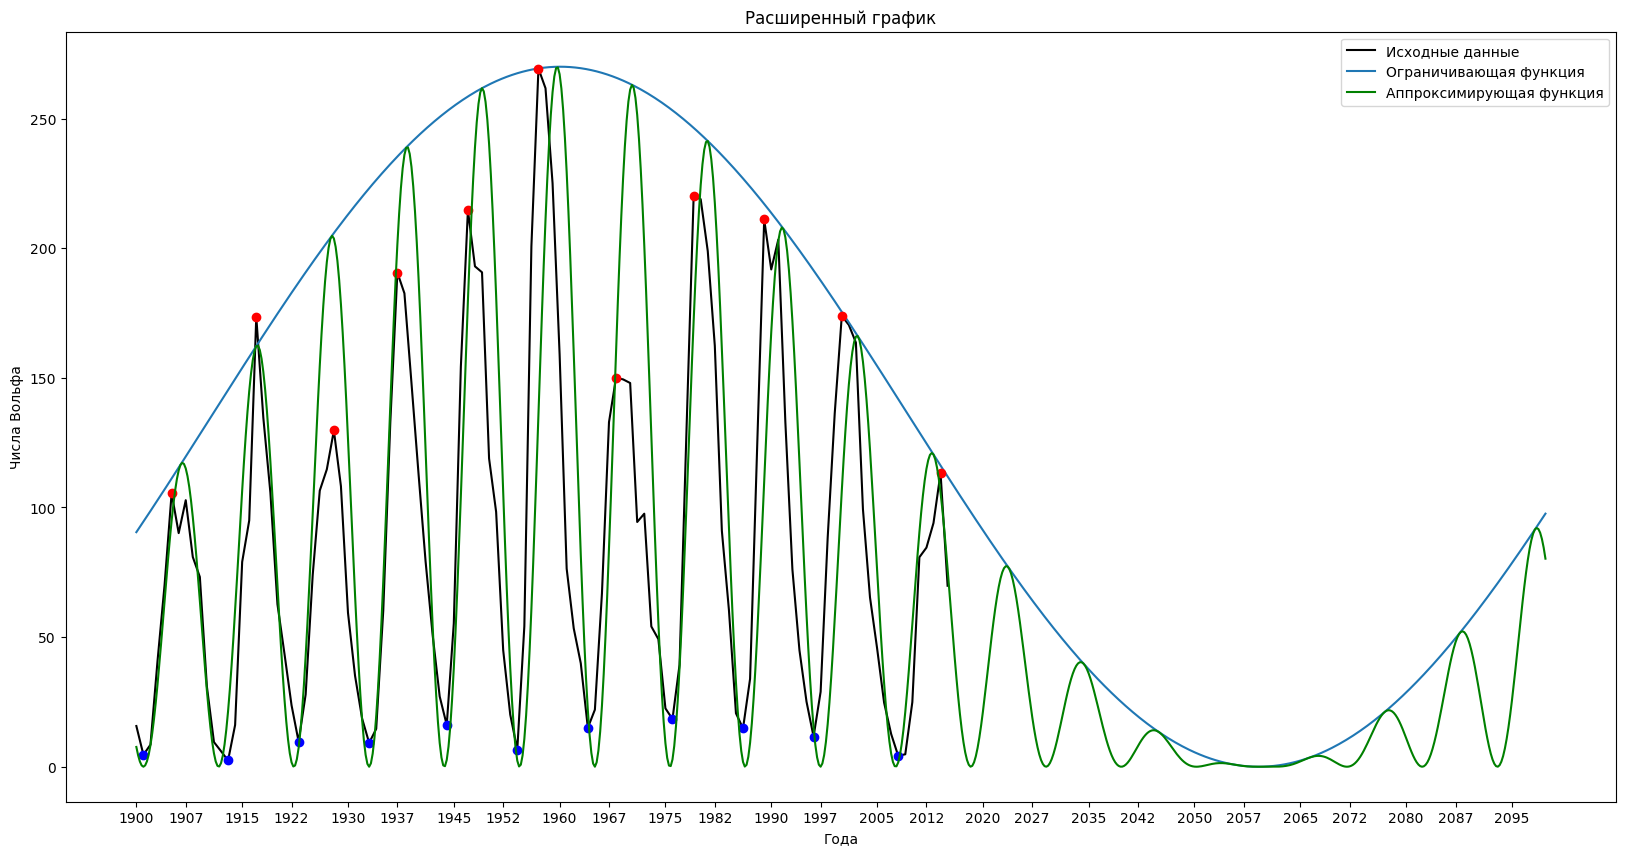

In [8]:
years = np.arange(1900, 2100, 1 / step)
max_values_of_sin = np.sin((years - 1900) * np.pi / 99 - np.pi * 0.107) * 135 + 135

value_function = np.sin(W * (years - 1901) + F) * max_values_of_sin / 2 + max_values_of_sin / 2

plt.figure(figsize=(20,10))
plt.xticks(years[::30].astype(int))
plt.xlabel("Года")
plt.ylabel("Числа Вольфа")
plt.plot(year, Wolf_numbers, 'k', label="Исходные данные")
plt.plot(years, max_values_of_sin, label="Ограничивающая функция")
plt.plot(min_years, min_Wolf_numbers, 'bo')
plt.plot(max_years, max_Wolf_numbers, 'ro')
plt.plot(years, value_function, 'g', label="Аппроксимирующая функция")
plt.legend()
plt.title("Расширенный график")
pass

Вычислим года минимумов и максимумов солнечной активности в будущем

In [9]:
min_years_in_future = np.array([])
min_years_in_future = np.append(min_years_in_future, (min_years[min_years.size-1]+average_of_min_years).astype(int))
while min_years_in_future[min_years_in_future.size-1]+average_of_min_years<2100:
  min_years_in_future = np.append(min_years_in_future, min_years_in_future[min_years_in_future.size-1]+average_of_min_years)
print("Годы максимумов солнечной активности в будущем: ", min_years_in_future.astype(int))
print("Средний шаг между годами: ", average_of_min_years)

Годы максимумов солнечной активности в будущем:  [2018 2028 2039 2049 2060 2071 2081 2092]
Средний шаг между годами:  10.663349463976184


In [10]:
max_years_in_future = np.array([])
max_years_in_future = np.append(max_years_in_future, (max_years[max_years.size-1]+average_of_max_years).astype(int))
while max_years_in_future[max_years_in_future.size-1]+average_of_max_years<2100:
  max_years_in_future = np.append(max_years_in_future, max_years_in_future[max_years_in_future.size-1]+average_of_max_years)
print("Годы максимумов солнечной активности в будущем: ", max_years_in_future.astype(int))
print("Средний шаг между годами: ", average_of_max_years)

Годы максимумов солнечной активности в будущем:  [2024 2034 2045 2056 2067 2078 2088 2099]
Средний шаг между годами:  10.82710262271983


# Вывод

Таким образом, следующий пик солнечной активности (максимальный) будет наблюдаться в 2024 году